# Exploratory analysis of Perceptions about Science and Open Science

This analysis revolves around the undergraduate thesis carried out by Franco Sebastián Benítez, under the supervision of Débora Burin and Lucas Cuenya, from the School of Psychology of the University of Buenos Aires.

As set in our preregistration, we are checking the following aspects:

1) Check for exclusion criteria in the demographic data, and in the completion rate.

2) Describe the sample’s demographic characteristics. 

3) Analyse the total percentage of “yes” responses to belief in crisis. Analyse as a function of career stage and methodological approach.

4) Qualitative analysis of open field response to belief in crisis.

5) Percentage of  agreement with each, and combined, statements about replication crisis, p-value, publication bias. Analyse as a function of career stage and methodological approach.

6) Percentage of  agreement with each, and combined, statements about perceived barriers. Analyse as a function of career stage and methodological approach.

7) Percentage of  agreement with each, and combined, statements about attitudes against adopting open science practices. Analyse as a function of career stage and methodological approach.

8) Qualitative analysis of open field response to attitudes about barriers against adopting open science practices.

## Loading the necessary libraries

In [88]:
import pandas as pd                         # data wrangling
import matplotlib.pyplot as plt             # plotting
import seaborn as sns                       # plotting 2.0
import re                                   # format text
from wordcloud import WordCloud, STOPWORDS  # text analysis
from unidecode import unidecode             # remove accents
import statistics as stats                  # stats

## Loading the dataset

In [89]:
df = pd.read_csv("../data/Percepciones sobre ciencia y ciencia abierta.csv")

In [90]:
pd.set_option('max_columns', None) # display all columns

In [91]:
df.head()

Timestamp ¿Acepta participar? Edad (años)  \
0  2021/04/16 11:57:53 AM GMT-3                  Sí          37   
1  2021/04/16 12:13:54 PM GMT-3                  Sí          48   
2   2021/04/16 2:43:17 PM GMT-3                  Sí          37   
3   2021/04/16 3:33:59 PM GMT-3                  Sí          31   
4   2021/04/16 3:35:35 PM GMT-3                  Sí          38   

  Nivel educativo alcanzado    Área/s de investigación  \
0                Licenciado    Psicoanálisis Filosofía   
1                 Doctorado                    Alcohol   
2                 Doctorado     Neurociencia cognitiva   
3                 Doctorado              Psicoterapia    
4                 Doctorado  Psicología del desarrollo   

  ¿Ha participado en un proyecto de investigación (v. g., UBACyT, CONICET) en los últimos 5 años?  \
0                                                 Sí                                                
1                                                 Sí                                                
2                                                 Sí                                                
3                                                 Sí                                                
4                                                 Sí                                                

  ¿Ha publicado en una revista indexada con referato (v. g., Scopus, Scimago, Scielo) en los últimos 5 años?  \
0                                                 Sí                                                           
1                                                 Sí                                                           
2                                                 Sí                                                           
3                                                 Sí                                                           
4                                                 Sí                                                           

  Marque su posición actual en la Facultad de Psicología de la UBA  \
0                                                ATP                 
1                                    Adjunto;Titular                 
2                                            Titular                 
3         Titular;Ademas cargo Investigacion/docente                 
4                                                ATP                 

  ¿Qué tipo de metodología suele predominar en sus estudios?  \
0                                        Cualitativa           
1                                              MIxta           
2                                              MIxta           
3                                       Cuantitativa           
4                                       Cuantitativa           

  ¿Cree que hay una crisis en la ciencia?  \
0                                      No   
1                                      No   
2                                      No   
3                                      Sí   
4                                      No   

  Si su respuesta a la pregunta anterior ha sido “Sí”, señale por qué cree que hay una crisis en la ciencia  \
0                                                NaN                                                          
1                                                NaN                                                          
2                                                NaN                                                          
3                                    Financiamiento                                                           
4                                                NaN                                                          

  Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas]  \
0                      

In [92]:
df.shape

(94, 53)

As we see, the data contains 53 columns and 94 rows.

Now, let's rename the columns to make it easier to manipulate and plot. 

In [93]:
column_names = {"Timestamp": "timestamp",
                "¿Acepta participar?": "consent",
                "Edad (años)": "age",
                "Nivel educativo alcanzado": "education",
                "Área/s de investigación": "area",
                "¿Ha participado en un proyecto de investigación (v. g., UBACyT, CONICET) en los últimos 5 años?": "project",
                "¿Ha publicado en una revista indexada con referato (v. g., Scopus, Scimago, Scielo) en los últimos 5 años?": "journal",
                "Marque su posición actual en la Facultad de Psicología de la UBA": "position",
                "¿Qué tipo de metodología suele predominar en sus estudios?": "methodology",
                "¿Cree que hay una crisis en la ciencia?": "belief",
                "Si su respuesta a la pregunta anterior ha sido “Sí”, señale por qué cree que hay una crisis en la ciencia": "belief_comments",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas]": "Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [A las revistas científicas no les interesa publicar resultados que no son estadísticamente significativos]": "A las revistas científicas no les interesa publicar resultados que no son estadísticamente significativos",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Cuando leo un artículo tengo mayor confianza en la calidad del estudio si los resultados son estadísticamente significativos]": "Cuando leo un artículo tengo mayor confianza en la calidad del estudio si los resultados son estadísticamente significativos",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Que un resultado no fuera estadísticamente significativo sería un criterio para no seguir investigando esas variables]": "Que un resultado no fuera estadísticamente significativo sería un criterio para no seguir investigando esas variables",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Una conclusión científica (por ejemplo, si un tratamiento es mejor que otro) debe estar basado en si el p-valor es o no es estadísticamente significativo]": "Una conclusión científica (por ejemplo, si un tratamiento es mejor que otro) debe estar basado en si el p-valor es o no es estadísticamente significativo",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Un resultado estadísticamente significativo es un resultado importante]": "Un resultado estadísticamente significativo es un resultado importante",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [El valor de p < .05 confirma que el hallazgo será útil para la comunidad científica]": "El valor de p < .05 confirma que el hallazgo será útil para la comunidad científica",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [El valor de p = .001 confirma que el tamaño del efecto ha sido grande]": "El valor de p = .001 confirma que el tamaño del efecto ha sido grande",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Cuando los resultados de diferentes investigadores son contradictorios entonces sería necesario llevar a cabo un estudio de replicación sobre la misma temática]": "Cuando los resultados de diferentes investigadores son contradictorios entonces sería necesario llevar a cabo un estudio de replicación sobre la misma temática",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [La realización de estudios de replicación es necesaria para el avance de la ciencia]": "La realización de estudios de replicación es necesaria para el avance de la ciencia",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Si los resultados sobre una determinada temática son unánimes por parte de diferentes equipos de investigación entonces los estudios de replicación no son necesarios]": "Si los resultados sobre una determinada temática son unánimes por parte de diferentes equipos de investigación entonces los estudios de replicación no son necesarios",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Los estudios de replicación solamente tienen sentido cuando no se detectan diferencias estadísticamente significativas en el estudio original]": "Los estudios de replicación solamente tienen sentido cuando no se detectan diferencias estadísticamente significativas en el estudio original",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [No es necesario replicar un estudio cuando ya se detectaron efectos estadísticamente significativos en el estudio original]": "No es necesario replicar un estudio cuando ya se detectaron efectos estadísticamente significativos en el estudio original",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [El principal objetivo de las revistas científicas es publicar hallazgos novedosos]": "El principal objetivo de las revistas científicas es publicar hallazgos novedosos",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [La ciencia avanza más con estudios que plantean hipótesis novedosas que con estudios de replicación de otras investigaciones]": "La ciencia avanza más con estudios que plantean hipótesis novedosas que con estudios de replicación de otras investigaciones",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Creo que, en general, los errores que se pueden haber cometido en un estudio científico siempre se detectan y corrigen antes de ser publicados]": "Creo que, en general, los errores que se pueden haber cometido en un estudio científico siempre se detectan y corrigen antes de ser publicados",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Las tareas de revisión y corrección de los manuscritos que llevan a cabo los revisores de las revistas garantizan de forma fiable la calidad de los resultados científicos]": "Las tareas de revisión y corrección de los manuscritos que llevan a cabo los revisores de las revistas garantizan de forma fiable la calidad de los resultados científicos",
                " [Replicar un estudio previo]": "Replicar un estudio previo (1)",
                " [Pre-registrar un estudio antes de iniciar la recolección de datos]": "Pre-registrar un estudio antes de iniciar la recolección de datos (1)",
                " [Poner datos recolectados a disposición mediante plataformas o repositorios públicos.]": "Poner datos recolectados a disposición mediante plataformas o repositorios públicos (1)",
                " [Compartir los métodos analíticos (e.g., scripts de análisis) en plataformas o repositorios públicos]": "Compartir los métodos analíticos (e.g., scripts de análisis) en plataformas o repositorios públicos (1)",
                " [Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos]": "Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos (1)",
                " [Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio]": "Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio (1)",
                " [Compartir una pre-impresión (pre-print) publicándola en un repositorio público o semi-público]": "Compartir una pre-impresión (pre-print) publicándola en un repositorio público o semi-público (1)",
                " [Usar revisión por pares abierta]": "Usar revisión por pares abierta (1)",
                " [Publicar en revistas de acceso abierto]": "Publicar en revistas de acceso abierto (1)",
                " [Adaptar un test psicométrico]": "Adaptar un test psicométrico (1)",
                " [Participar en proyectos abiertos y colaborativos a gran escala]": "Participar en proyectos abiertos y colaborativos a gran escala (1)",
                " [Replicar un estudio previo].1": "Replicar un estudio previo (2)",
                " [Pre-registrar un estudio antes de iniciar la recolección de datos].1": "Pre-registrar un estudio antes de iniciar la recolección de datos (2)",
                " [Poner datos recolectados a disposición mediante plataformas o repositorios públicos]": "Poner datos recolectados a disposición mediante plataformas o repositorios públicos (2)",
                " [Compartir los métodos analíticos (e.g., scripts de análisis) en plataformas o repositorios públicos].1": "Compartir los métodos analíticos (e.g., scripts de análisis) en plataformas o repositorios públicos (2)",
                " [Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos].1": "Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos (2)",
                " [Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio].1": "Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio (2)",
                " [Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza]": "Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza (2)",
                " [Usar revisión por partes abierta]": "Usar revisión por partes abierta (2)",
                " [Publicar en revistas de acceso abierto].1": "Publicar en revistas de acceso abierto (2)",
                " [Adaptar un test psicométrico].1": "Adaptar un test psicométrico (2)",
                " [Participar en proyectos abiertos y colaborativos a gran escala].1": "Participar en proyectos abiertos y colaborativos a gran escala (2)",
                "¿Cuáles le parecen que son las mayores barreras para la aceptación y puesta en práctica de prácticas de ciencia abierta en su campo y/o lugar de trabajo?": "barriers_1",
                "Si aplica, por favor describa brevemente qué barreras ha experimentado para incorporar o mantener prácticas de ciencia abierta": "barriers_2",
                "Por último, si posee alguna idea o comentario respecto a esta encuesta o al tema que aborda, por favor escribalo brevemente a continuación ": "comments"
               }

df.rename(columns = column_names, inplace=True)
df.timestamp = pd.to_datetime(df.timestamp)
df.age = [re.sub(r"[a-zñ]+", "", i) for i in df["age"]] # remove " años" in values, to convert them in integers
df.age = pd.to_numeric(df.age, downcast="integer")

Let's check all the types.

In [94]:
#df.dtypes

Let's check all the renamings.

In [95]:
df.columns 

Index(['timestamp', 'consent', 'age', 'education', 'area', 'project',
       'journal', 'position', 'methodology', 'belief', 'belief_comments',
       'Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas',
       'A las revistas científicas no les interesa publicar resultados que no son estadísticamente significativos',
       'Cuando leo un artículo tengo mayor confianza en la calidad del estudio si los resultados son estadísticamente significativos',
       'Que un resultado no fuera estadísticamente significativo sería un criterio para no seguir investigando esas variables',
       'Una conclusión científica (por ejemplo, si un tratamiento es mejor que otro) debe estar basado en si el p-valor es o no es estadísticamente significativo',
       'Un resultado estadísticamente significativo es un resultado importante',
       'El valor de p < .05 confirma que el hallazgo será útil para la comunidad científica',
  

## Analysis 

### 1) Check for exclusion criteria in the demographic data, and in the completion rate

To be considered "researchers", our respondents should either have participated in a research project or have publicated in a scientific journal. In both cases, in a maximum range of five years. 

In [96]:
exclusion_criteria = df[["project", "journal"]]
excluded = []
        
for (i, (a, b)) in enumerate(exclusion_criteria.itertuples(index=False), start=0):
    if a == "No" and b == "No":
        print(f"Participant n° {i} will be excluded")
        excluded.append(i)

df.drop(excluded, axis=0)

Participant n° 20 will be excluded
Participant n° 26 will be excluded
Participant n° 64 will be excluded
Participant n° 78 will be excluded
Participant n° 80 will be excluded


timestamp consent  age                   education  \
0  2021-04-16 11:57:53+03:00      Sí   37                  Licenciado   
1  2021-04-16 12:13:54+03:00      Sí   48                   Doctorado   
2  2021-04-16 14:43:17+03:00      Sí   37                   Doctorado   
3  2021-04-16 15:33:59+03:00      Sí   31                   Doctorado   
4  2021-04-16 15:35:35+03:00      Sí   38                   Doctorado   
..                       ...     ...  ...                         ...   
89 2021-07-15 11:23:41+03:00      Sí   43                   Doctorado   
90 2021-07-20 14:40:53+03:00      Sí   27                  Licenciado   
91 2021-07-20 14:52:30+03:00      Sí   36    Especialización;Maestría   
92 2021-07-20 15:01:53+03:00      Sí   28  Estudiante de licenciatura   
93 2021-07-23 08:53:00+03:00      Sí   42                   Doctorado   

                                                 area project journal  \
0                             Psicoanálisis Filosofía      Sí      Sí   
1                                             Alcohol      Sí      Sí   
2                              Neurociencia cognitiva      Sí      Sí   
3                                       Psicoterapia       Sí      Sí   
4                           Psicología del desarrollo      Sí      Sí   
..                                                ...     ...     ...   
89               orientación vocacional y ocupacional      Sí      Sí   
90                          Psicologia del desarrollo      Sí      Sí   
91                            Evaluación psicológica       Sí      Sí   
92  Orignalmente psicología del desarrollo, recien...      Sí      No   
93                             Psicopedagogía Clínica      Sí      Sí   

                                             position   methodology belief  \
0                                                 ATP   Cualitativa     No   
1                                     Adjunto;Titular         MIxta     No   
2                                             Titular         MIxta     No   
3          Titular;Ademas cargo Investigacion/docente  Cuantitativa     Sí   
4                                                 ATP  Cuantitativa     No   
..                                                ...           ...    ...   
89                                                ATP   Cualitativa     No   
90  Co ayudante (recibida) y mi lugar de trabajo e...  Cuantitativa     Sí   
91                                                ATP  Cuantitativa     Sí   
92                                                ATP  Cuantitativa     No   
93                                                ATP   Cualitativa     Sí   

                                      belief_comments  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                     Financiamiento    
4                                                 NaN   
..                                                ...   
89                                                NaN   
90  Poco presupuesto, que permite a menos gente in...   
91  Son muchas las causas, las primeras el presupu...   
92                                                NaN   
93  Pienso que la ciencia debe vivir situaciones d...   

   Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas  \
0                                     Algo de acuerdo                                                                              
1                                      Muy de acuerdo                                                                              
2                                      Muy de acuerdo                                                                              
3                                 Bastante de acuerdo                                                              

As we observe, now have five participants (rows) less.

### 2) Describe the sample’s demographic characteristics

#### 2.1) Education

We see the data.

In [97]:
df["education"]

0                     Licenciado
1                      Doctorado
2                      Doctorado
3                      Doctorado
4                      Doctorado
                 ...            
89                     Doctorado
90                    Licenciado
91      Especialización;Maestría
92    Estudiante de licenciatura
93                     Doctorado
Name: education, Length: 94, dtype: object

And we plot them. 

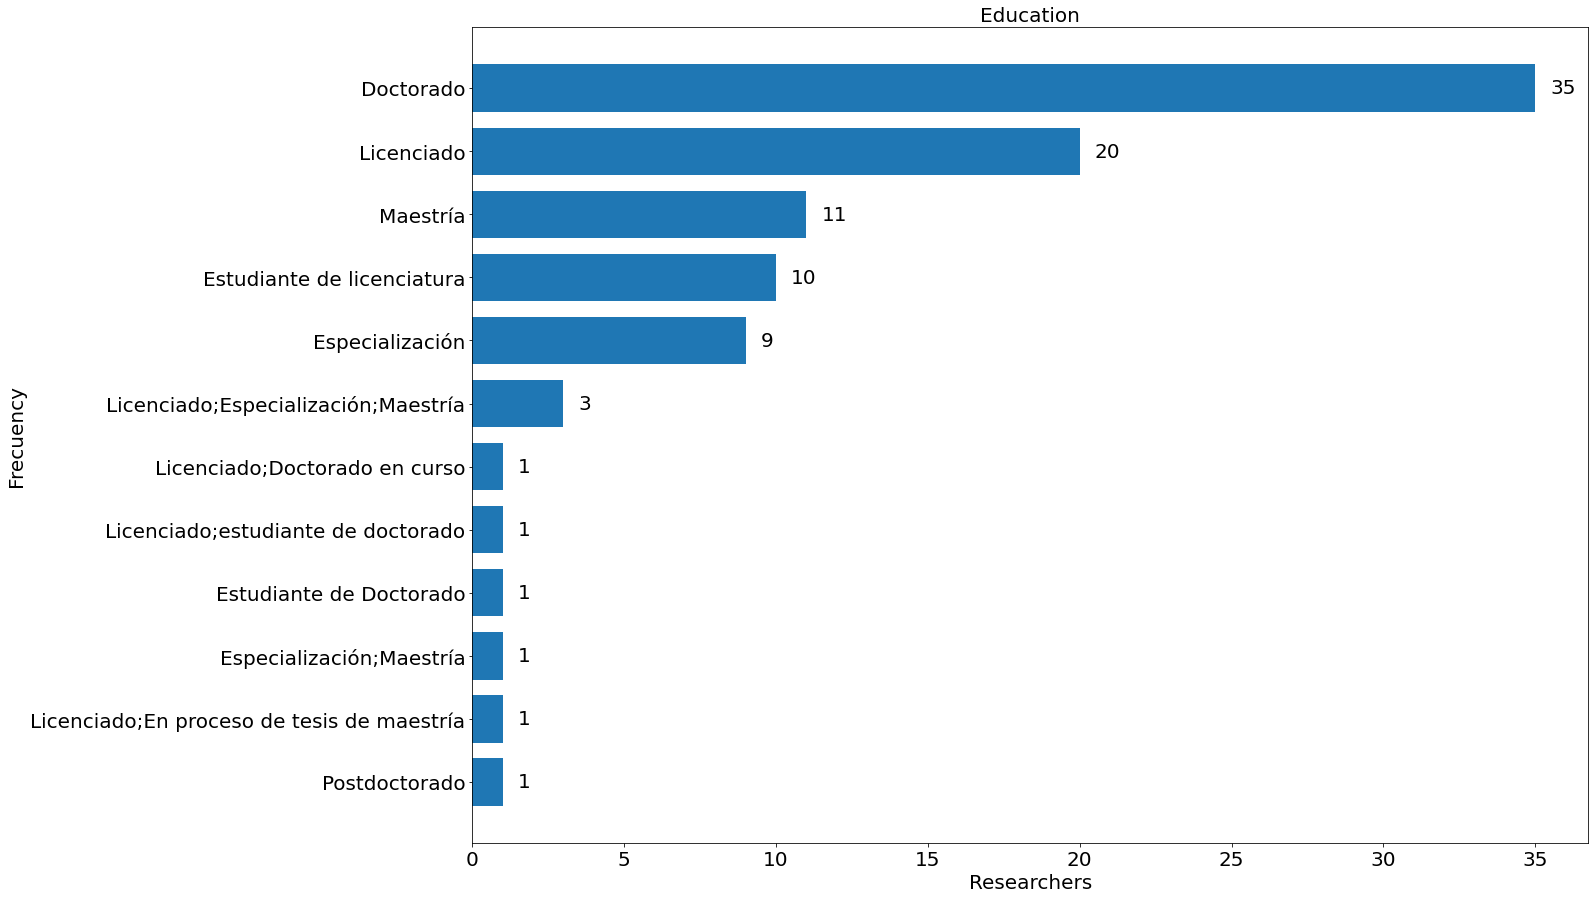

In [98]:
def horizontal_bar_plot(serie, title=None):
    y = serie.value_counts(ascending=True)
    fig, ax = plt.subplots(figsize=(20,15))
    ax.tick_params(labelsize=20)
    ax.barh(y.index, y, height=0.75)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel("Researchers", fontsize=20)
    ax.set_ylabel("Frecuency", fontsize=20)
    _, xmax = plt.xlim()
    plt.xlim(0, xmax)
    for i, v in enumerate(y):
        ax.text(v + .5, i, str(v), fontsize=20, ha='left', va='center')
    plt.show()    

horizontal_bar_plot(df["education"], "Education")

Let's go to clean the data a little. We will group each category into five large groups: "Doctorado", "Licenciatura", "Especialización", "Maestría", and "Posdoctorado", regardless of whether it is ongoing or completed.

First, let's go to separate our different categories by semicolon. For that, we create a new dataframe specific to our variable. The same contains more rows because the previous rows were expanded by semicolon. The variable, in this case, will be called "education_df". 

We add "belief", because we are using this variable later. 

In [99]:
education_df = df[["education", "belief"]].assign(education=df["education"].str.split(";")).explode("education").reset_index(drop=True)

Then, we have the next new dataframe: 

In [100]:
education_df

education belief
0                    Licenciado     No
1                     Doctorado     No
2                     Doctorado     No
3                     Doctorado     Sí
4                     Doctorado     No
..                          ...    ...
99                   Licenciado     Sí
100             Especialización     Sí
101                    Maestría     Sí
102  Estudiante de licenciatura     No
103                   Doctorado     Sí

[104 rows x 2 columns]

Now, let's replace.

In [101]:
def replace_columns(df, column_to_replace, original, replaced): # let's go to reuse this function later
    """
    Returns: a df and its columns with strings replaced 
    """
    for col in [column_to_replace]:
        df[col] = df[col].str.replace(original, replaced)
    
replace_columns(education_df, "education", "Licenciado", "Licenciatura")
replace_columns(education_df, "education", "Estudiante de licenciatura", "Licenciatura")
replace_columns(education_df, "education", "estudiante de doctorado", "Doctorado")
replace_columns(education_df, "education", "Doctorado en curso", "Doctorado")
replace_columns(education_df, "education", "Estudiante de Doctorado", "Doctorado")
replace_columns(education_df, "education", "En proceso de tesis de maestría", "Maestría")

And we plot.

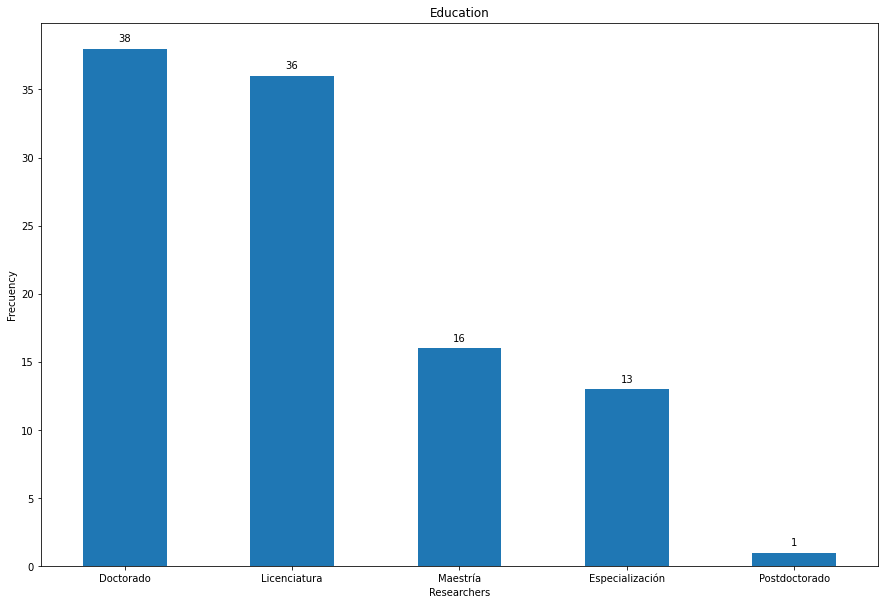

In [102]:
def vertical_bar_plot(df, serie, title=None):
    plt.figure(figsize=(15,10))
    ax = df.groupby(serie).size().sort_values(ascending=False).plot.bar()
    ax.set_title(title)
    ax.set_xlabel("Researchers")
    ax.set_ylabel("Frecuency")
    def add_value_labels(ax, spacing=5):
        for rect in ax.patches:
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
            space = spacing
            va = 'bottom'
            if y_value < 0:
                space *= -1
                va = 'top'
            label = y_value
            ax.annotate(
                label,                      
                (x_value, y_value),         
                xytext=(0, space),          
                textcoords="offset points", 
                ha='center',                
                va=va) 
    add_value_labels(ax)
    plt.xticks(rotation=0)

vertical_bar_plot(education_df, "education", "Education")

Then, we have that most respondents have or are getting a doctorate grade,  followed by those that have or are getting a licentiate degree.

#### 2.2) Research area

First, we create a function that allow us to: 
1) remove accents and uppercases, 
2) join text from all rows in serie, and 
3) drop NA's in case of having. 

In [137]:
def extract_text(serie):
    serie.dropna(inplace=True)
    serie = serie.apply(unidecode).str.casefold().reset_index(drop=True)
    text = " ".join(text for text in serie)
    return text

Now, we create a function to plot. (We are going to reuse this function later).  

In [104]:
def make_worldcloud(data, stopwords=None):
    wordcloud=WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=800, 
        width=800, height=800,
        random_state=0
        ).generate(data)
    plt.figure(figsize = (12,15), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    return plt.show() 

Finally, we extract text from serie and plot it.

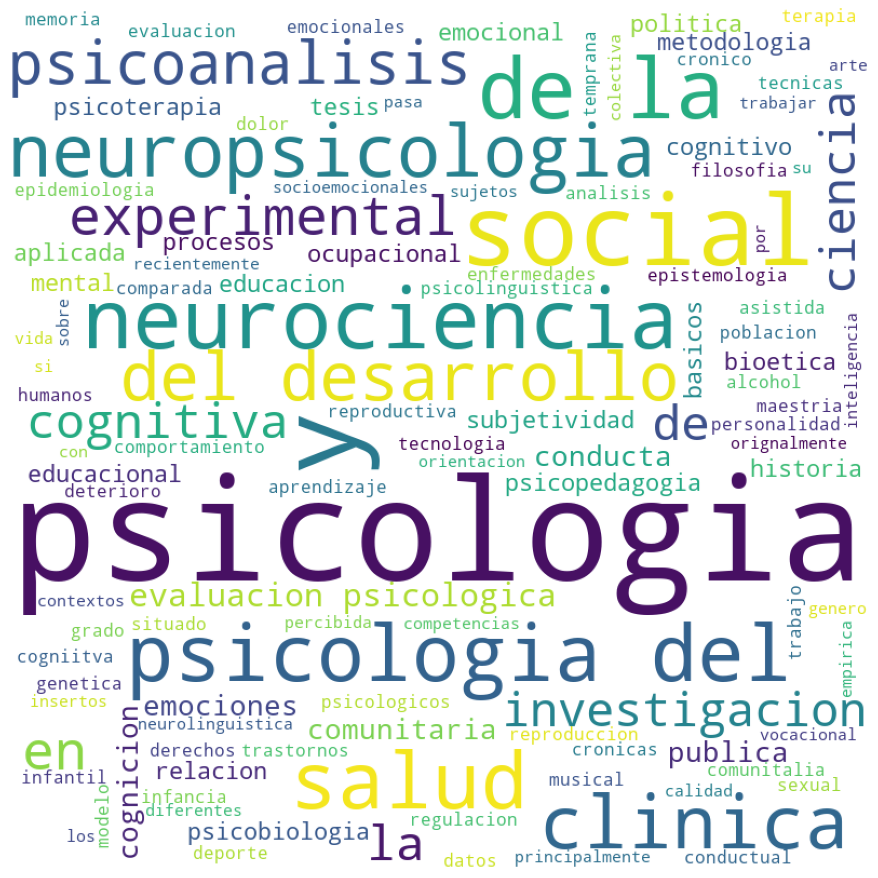

In [124]:
make_worldcloud(extract_text(df["area"])

We run again adding a list of stopwords as argument.

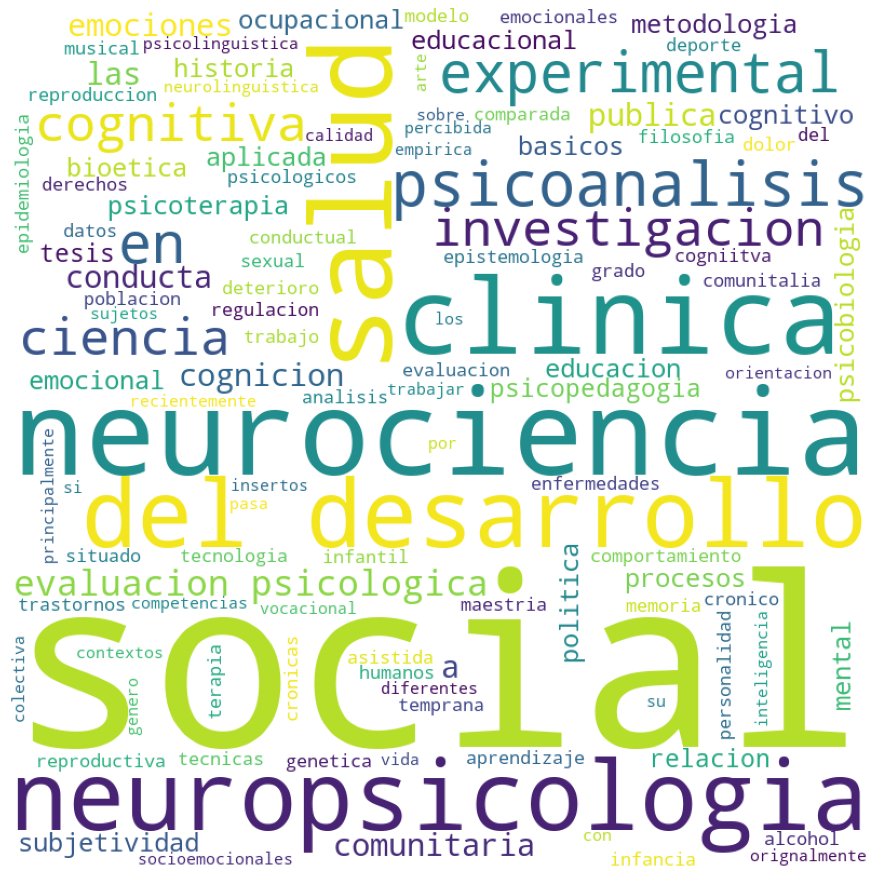

In [125]:
make_worldcloud(extract_text(df["area"]), ["psicologia", "y", "la", "de"])

We can see that neuroscience, neuropsychology, social psychology ("social"), developmentental psychology ("del desarrollo"), clinical psychology ("clinica"), and health psychology ("salud"), seem to be the most frequent areas in our sample.

#### 2. 3) Position 

Let's reuse the function to create a horizontal bar plot.

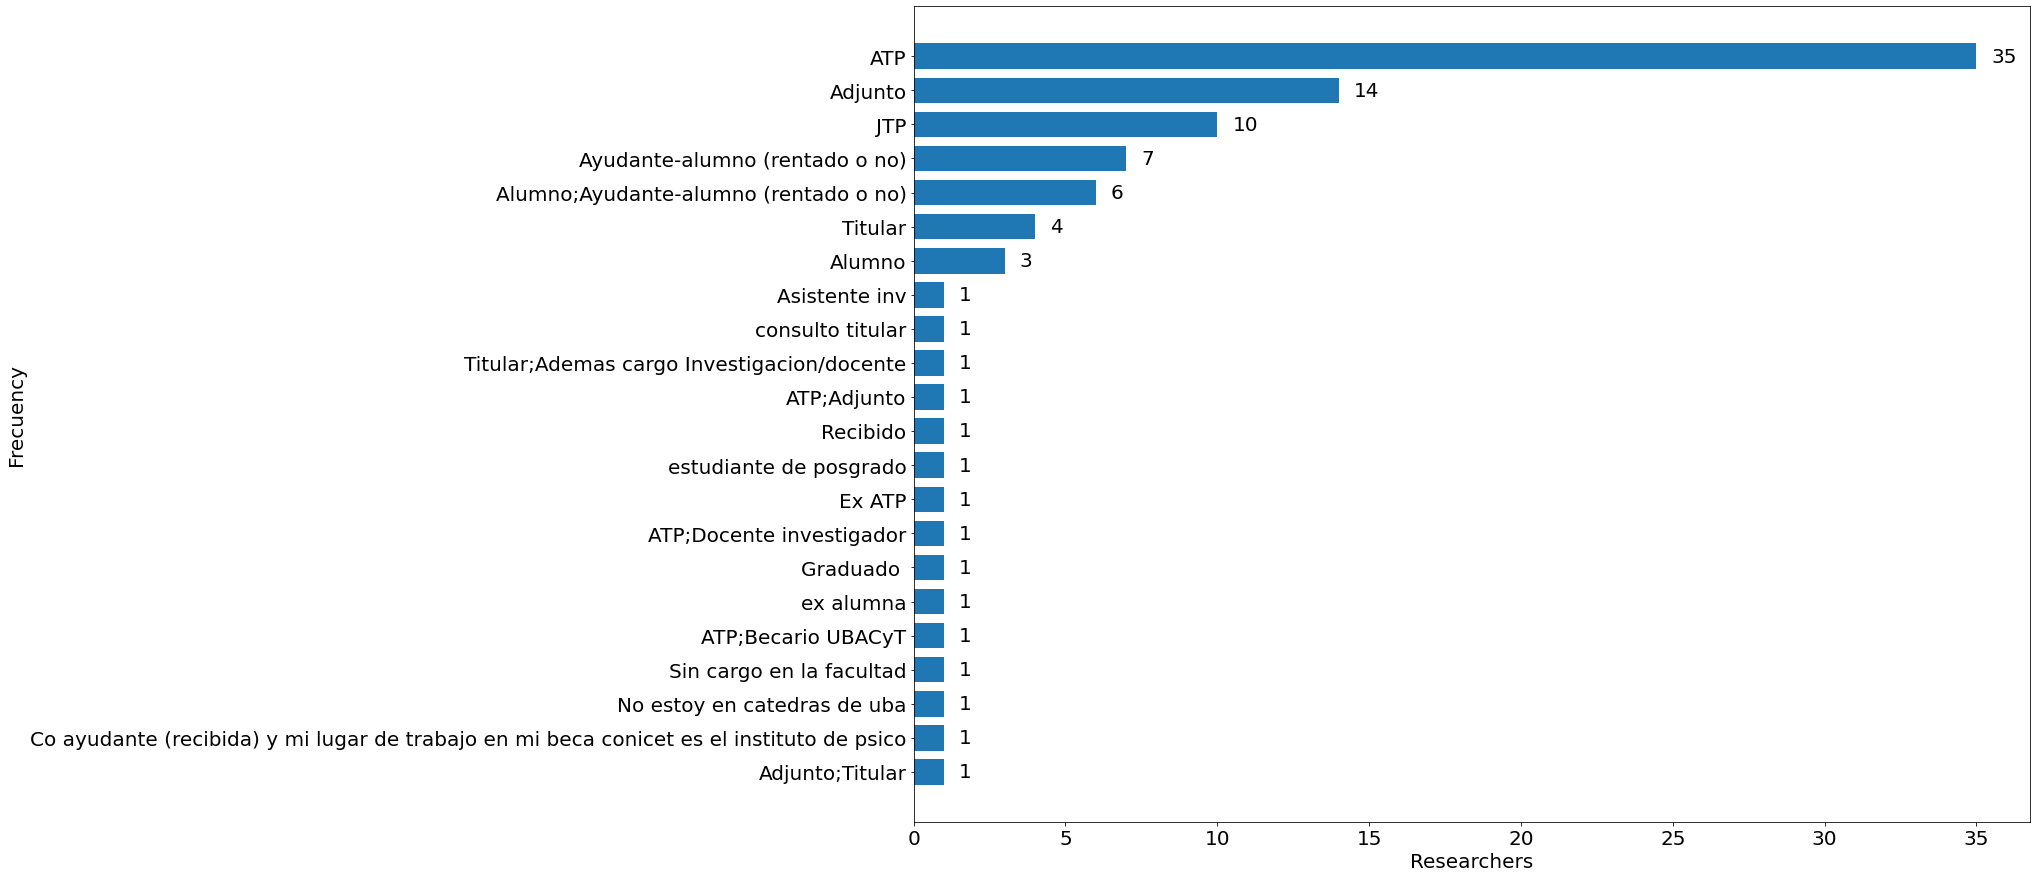

In [107]:
horizontal_bar_plot(df["position"])

As it was done previously, we store the new values to a new dataframe. In this case, it will be called "position_df".

In [108]:
position_df = df[["position"]].assign(position=df["position"].str.split(";")).explode("position").reset_index(drop=True)

We plot the data. 

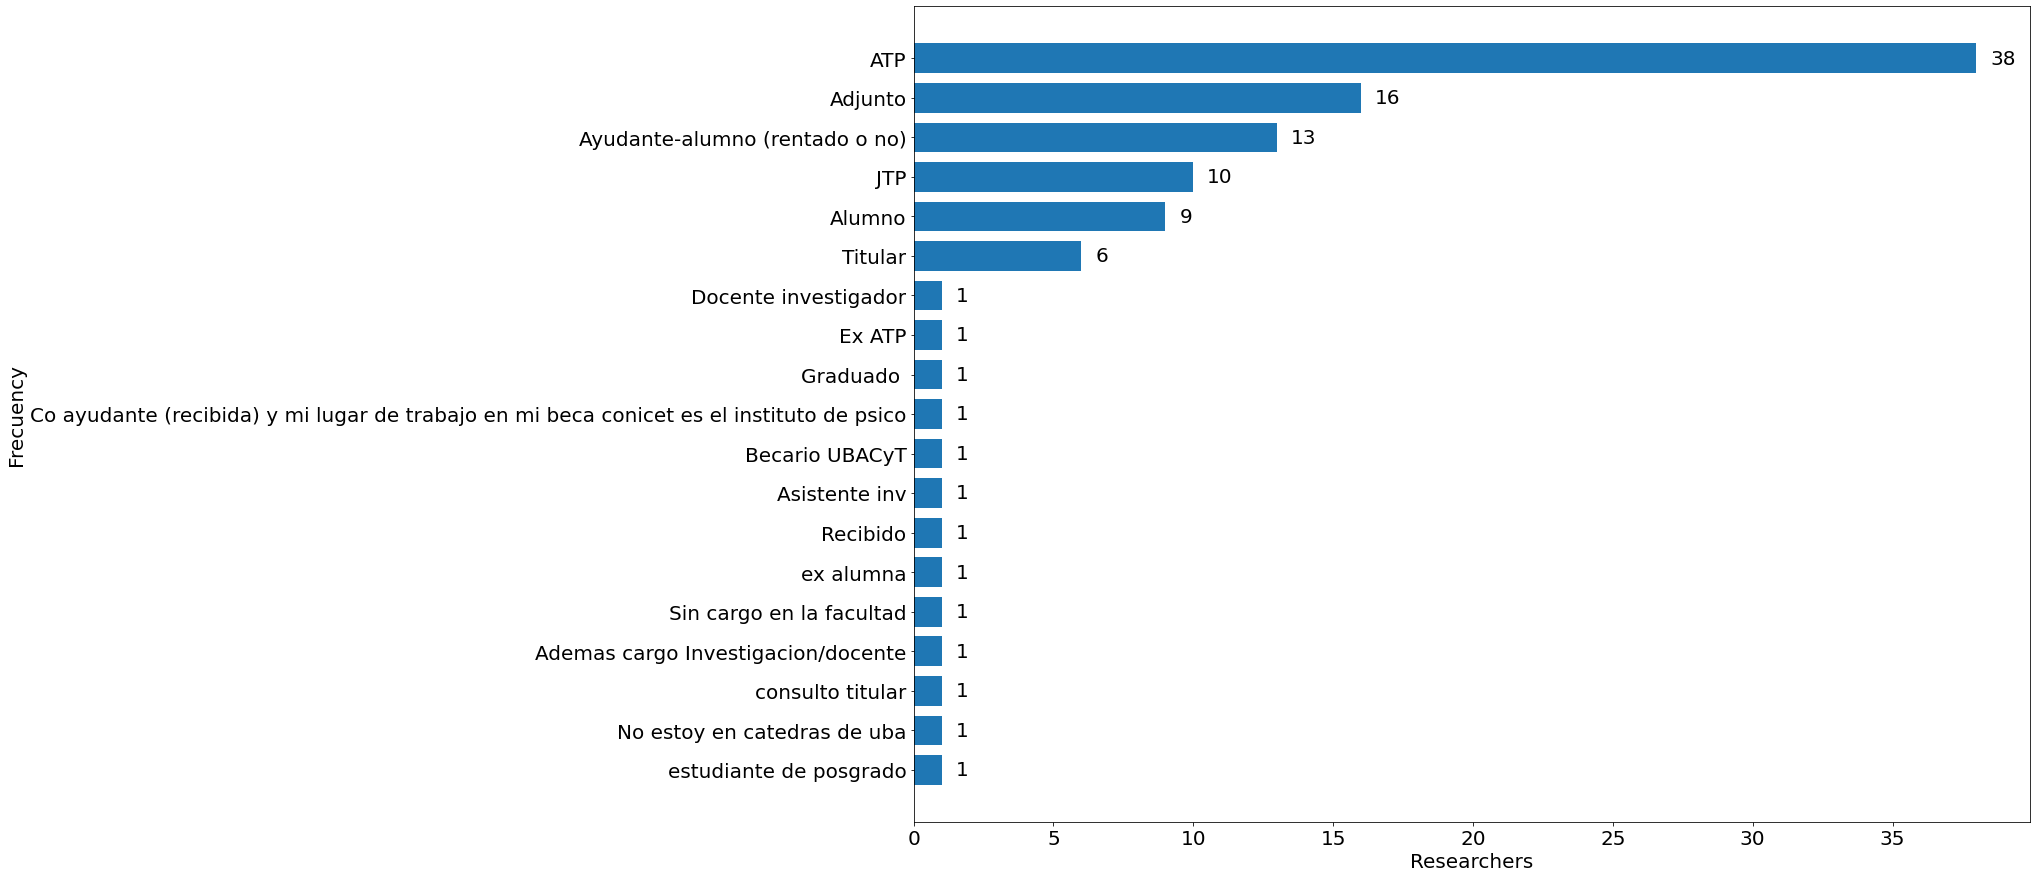

In [109]:
horizontal_bar_plot(position_df["position"])

Better, but it still does not look very good. However, we can see that most respondents have the rol of "Ayudante de Trabajos Prácticos", by its acronym "ATP". For now, we leave the position data so. 

#### 2.4) Methodology

Now, let's see the type of methodology that predominates in our sample of researchers. Directly, we plot the methodology serie in our dataframe. 

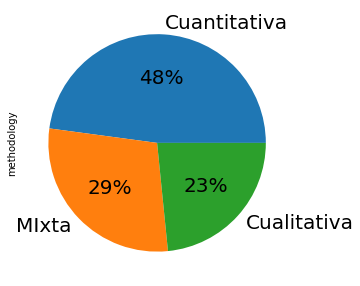

In [110]:
df["methodology"].value_counts().plot.pie(figsize = (10,5), autopct='%1.0f%%', fontsize=20)

As it can be seen, most respondents consider themselves predominantly practising a quantitative approach, being approximately a quarter those that strictly practise a qualitative methodology.

#### 2.5) Age

As to respondents' age, first we extract statistics and, then, plot the data directly.

In [111]:
stats.mean(df["age"])

37.148936170212764

In [112]:
stats.pstdev(df["age"])

12.24046085108684

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


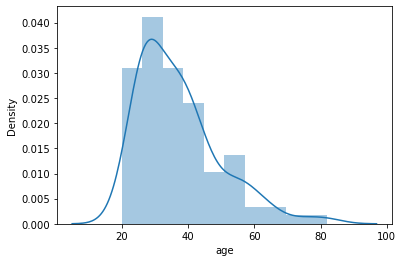

In [113]:
sns.distplot(df['age'])

As we observe, most respondents are located in the 20-40 age group.

### 3) Analyse the total percentage of “yes” responses to belief in crisis. Analyse as a function of career stage and methodological approach

#### 3.1) Belief

Regarding the belief in crisis variable, we directly plot the data.

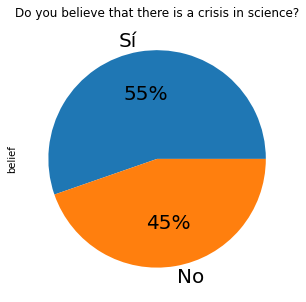

In [114]:
df["belief"].value_counts().plot.pie(title="Do you believe that there is a crisis in science?", 
                                     figsize = (10,5), 
                                     autopct = "%1.0f%%", 
                                     fontsize = 20)

As we can see, the results are divided. Other surveys, such as the Baker (2016) survey, perceive higher results as to "yes" percentages.

Below we will be seeing how those respondents who said "yes" justify their answers.

#### 3.2) Belief as a function of career stage

Now, we group the belief in crisis by career stage (researchers' education). We plot the data directly, enlarging the plot size. 

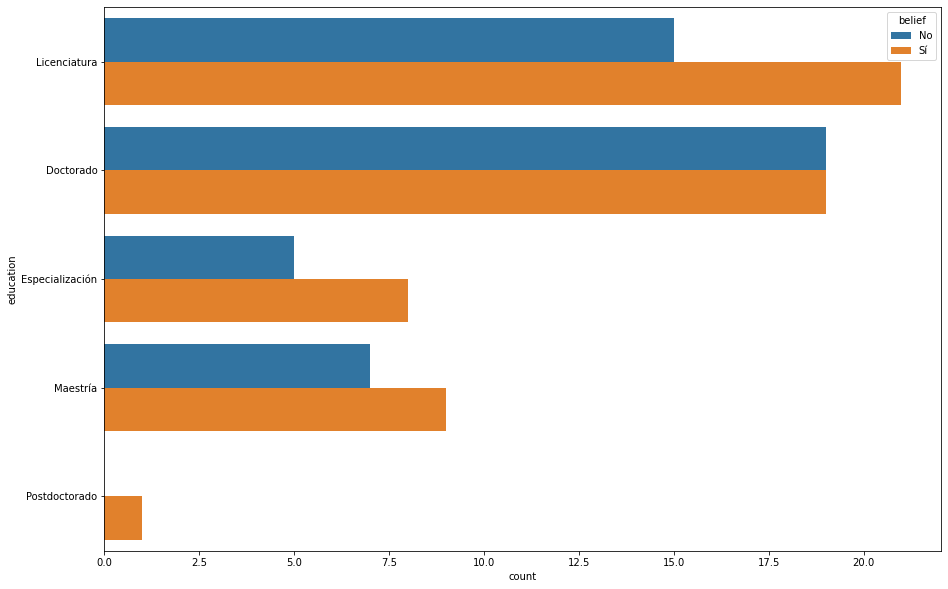

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(y='education', hue='belief', data=education_df)

As we can see, there are not important differences between belief in a crisis in science and researchers' career stage.   

#### 3.3) Belief as a function of methodological approach

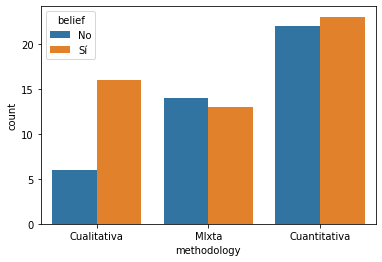

In [116]:
sns.countplot(x="methodology", hue="belief", data=df)

We can see that there are not substantial differences between usage of mixted and quantitative methodology as to belief in a crisis in science. However, there is a small difference between those that use predominatly qualitative methodology: these seem to believe more in a crisis in science.

Likewise, it is worth noting that the results between those using predominantly quantitative methodology are divided, given that the called "replicability crisis" has a lot to do with statistical problems, such as huge confidence in p-value and null hypothesis testing, and statistical fallacies.

#### 3.4) Belief as a function of age

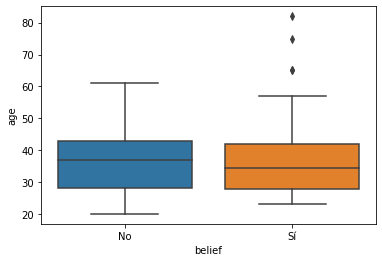

In [117]:
sns.boxplot(data=df, x='belief', y='age')

There are not clear correlation between belief in crisis in science and respondents' age.

### 4) Qualitative analysis of open field response to belief in crisis

Let's go to reuse the make_worldcloud() and extract_text() functions built previously. 

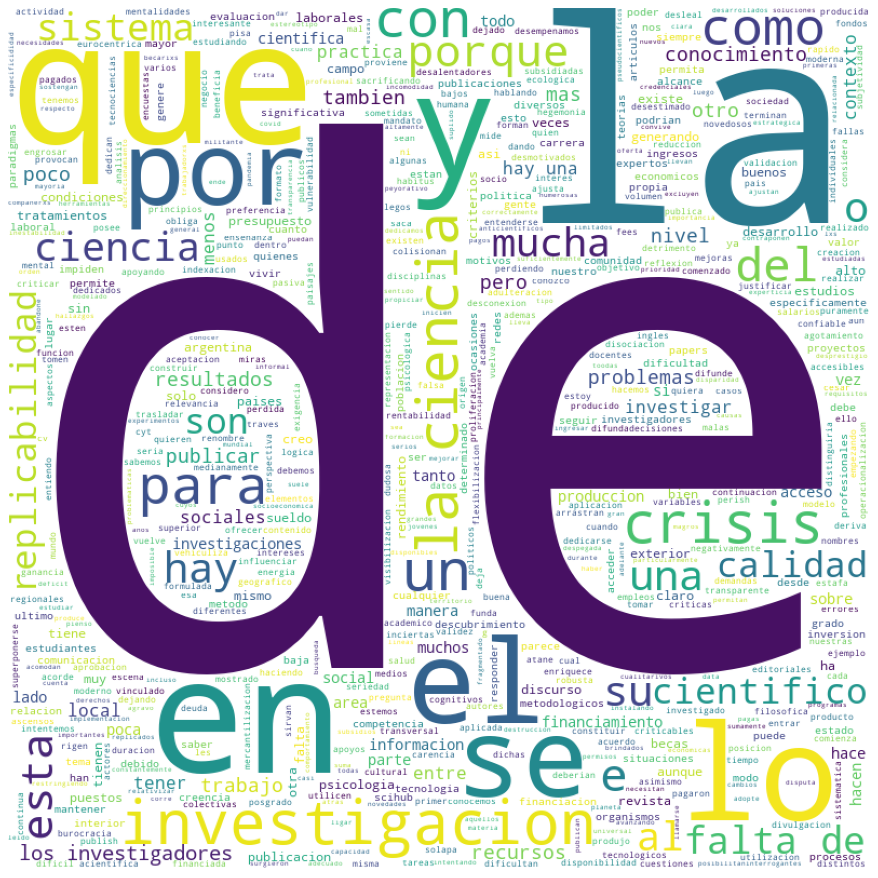

In [138]:
make_worldcloud(extract_text(df["belief_comments"]))

We add stopwords.

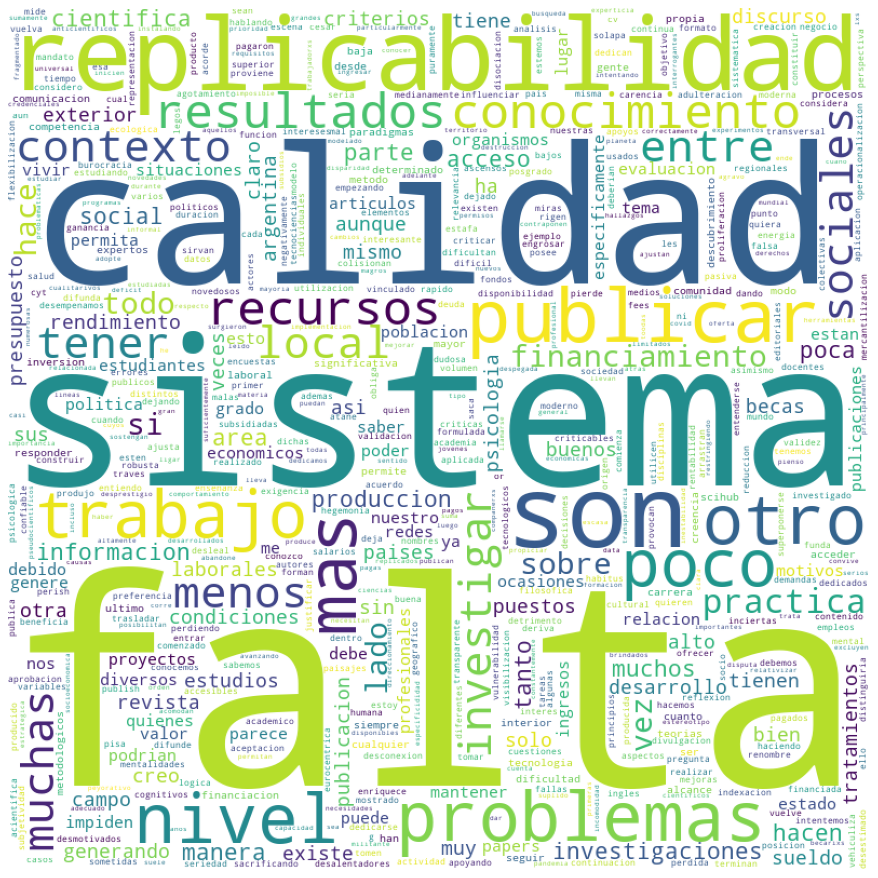

In [152]:
make_worldcloud(extract_text(df["belief_comments"]), ["que", "la", "y", "por", "porque", "en", "el", "para", "de", "se", "lo"
                                                      , "a", "como", "tambien", "los", "las", "del", "hay", "una", "pero", 
                                                      "esta", "ciencia", "investigadores", "investigacion", "no", "su", "un", 
                                                      "con", "al", "e", "mucha", "crisis", "o", "es", "cientifico"]) 

As now we can see, having filtered vague words, there are some words more frequent among those that answered "yes" to the question "Do you believe there are a crisis in science?". Such words more frequent are replicability ("replicabilidad"), system ("sistema"), absence ("falta"), and quality ("calidad"). 

Now let's see how many comments mentioned the "replicability" word as a cause of the crisis. First we create a new dataframe removing accents and uppercase of the comments.  

In [155]:
belief_comments_df = df["belief_comments"].apply(unidecode).str.casefold().to_frame().reset_index(drop=True)

We add the comments mentioning "replica" to a list. We use "replica" to catch both "replicacion" and "replicabilidad". 

In [158]:
l = [text for text in belief_comments_df["belief_comments"] if "replica" in text]

We print the data formatted.

In [159]:
for (i, text) in enumerate(l):
    print('Comment %d:\n'%(i+1), text)

Comment 1:
 por la falta de replicabilidad de los estudios.
Comment 2:
 hablando especificamente del campo de investigacion en psicologia social y politica existe una crisis que se debe a las bajas publicaciones de estudios de replicabilidad y los resultados desalentadores en los pocos estudios que existen.
a un nivel mas transversal la academia, debido a motivos politicos y economicos, posee diversos problemas que dificultan la creacion de una ciencia transparente, robusta, significativa y de una calidad superior (e.g preferencia de mayor volumen sacrificando calidad debido a politicas apoyando el publish or perish).
Comment 3:
 crisis en relacion a elementos criticables dentro de los sistemas de publicacion, ademas de aspectos metodologicos (como crisis de replicabilidad)
Comment 4:
 problemas en la operacionalizacion de variables y la validez ecologica que no permite buenos resultados en la replicabilidad
Comment 5:
 replicabilidad - teorias - metodos de analisis

Comment 6:
 partic

As we can see, only seven comments mention "replicabilidad" as a cause of crisis in science. 

### 5) Percentage of agreement with each, and combined, statements about replication crisis, p-value, publication bias. Analyse as a function of career stage and methodological approach

Let's go to create a tidy table that allow us to plot easily. 

This data, given that is provided for a likert scale, will be ploted with the HH package in R. 

In [ ]:
def make_table(column):
    df = column.value_counts().to_frame().reset_index()
    df = df.T
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    return df

def tables_by_columns(index_col_1, index_col_2):
    l = []    
    for (i, column) in enumerate(df):
        if (i >= index_col_1 and i <= index_col_2):
            l.append(make_table(df[column]))
    return l
            
def combinate_tables(l):
    df = pd.concat(l) 
    df.reset_index(level=0, inplace=True)
    df = df.rename(columns={'index': 'Measures'})
    return df

def convert_to_int(df):
    for (i, column) in enumerate(df):
        if (i > 0):
            df[[column]] = df[[column]].astype('Int64').fillna(0)
    return df

science = convert_to_int(combinate_tables(tables_by_columns(11, 27)))
experience = convert_to_int(combinate_tables(tables_by_columns(28, 38)))
efficiency = convert_to_int(combinate_tables(tables_by_columns(39, 49)))

science.to_csv(r'../data/science.csv', index=False) 
experience.to_csv(r'../data/experience.csv', index=False)
efficiency.to_csv(r'../data/efficiency.csv', index=False)

Now let's go to create and export tables grouped by career stage and methodological approach.

In [ ]:
def make_table_by_group(column, group):
    new_df = df.groupby(column)[group].value_counts().unstack().fillna(0).reset_index()
    new_df = new_df.T
    new_df.columns = new_df.iloc[0]
    new_df = new_df.drop(new_df.index[0])
    new_df.columns.name = None
    new_df = new_df.reset_index()
    return new_df 

def tables_by_columns_and_group(index_col_1, index_col_2, group):
    d = {}
    column_names = {}
    for (i, column) in enumerate(df):
        if (i >= index_col_1 and i <= index_col_2):
            column_names[column] = make_table_by_group(df[column], group)
            d.update(column_names)
    return d

def export_table(table, name):
    for (i, (k, v)) in enumerate(table.items()):
        v.to_csv("../data/"+name+"_"+str(i)+".csv")
    
export_table(tables_by_columns_and_group(11, 27, "education"), "science_by_education")    
export_table(tables_by_columns_and_group(28, 38, "education"), "experience_by_education") 
export_table(tables_by_columns_and_group(39, 49, "education"), "efficiency_by_education") 
export_table(tables_by_columns_and_group(11, 27, "methodology"), "science_by_methodology")    
export_table(tables_by_columns_and_group(28, 38, "methodology"), "experience_by_methodology") 
export_table(tables_by_columns_and_group(39, 49, "methodology"), "efficiency_by_methodology") 

### 6) Percentage of agreement with each, and combined, statements about perceived barriers. Analyse as a function of career stage and methodological approach

In [ ]:
barriers_1 = df[["barriers_1"]].assign(barriers_1=df[["barriers_1"]].barriers_1.str.split(";")).explode("barriers_1").reset_index(drop=True)
col_to_change = ['barriers_1']
for col in col_to_change:
    barriers_1[col] = barriers_1[col].str.replace('[0-9.]', '')
    
bar_plot(barriers_1["barriers_1"], "Major barriers against adopting open science practices")

In [ ]:
#df_1 = pd.DataFrame([{'var1': 'a,b,c', 'var2': 1}, {'var1': 'd,e,f', 'var2': 2}])
#df_1.assign(var1=df_1.var1.str.split(',')).explode('var1').reset_index(drop=True)
#df_1

In [ ]:
df_2 = df[["barriers_1", "education"]]
df_2 = df_2.assign(barriers_1=df_2.barriers_1.str.split(";")).explode("barriers_1").reset_index(drop=True)

new_df = df_2.groupby(df_2["barriers_1"])["education"].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
new_df

### 7) Percentage of agreement with each, and combined, statements about attitudes against adopting open science practices. Analyse as a function of career stage and methodological approach

### 8) Qualitative analysis of open field response to attitudes about barriers against adopting open science practices

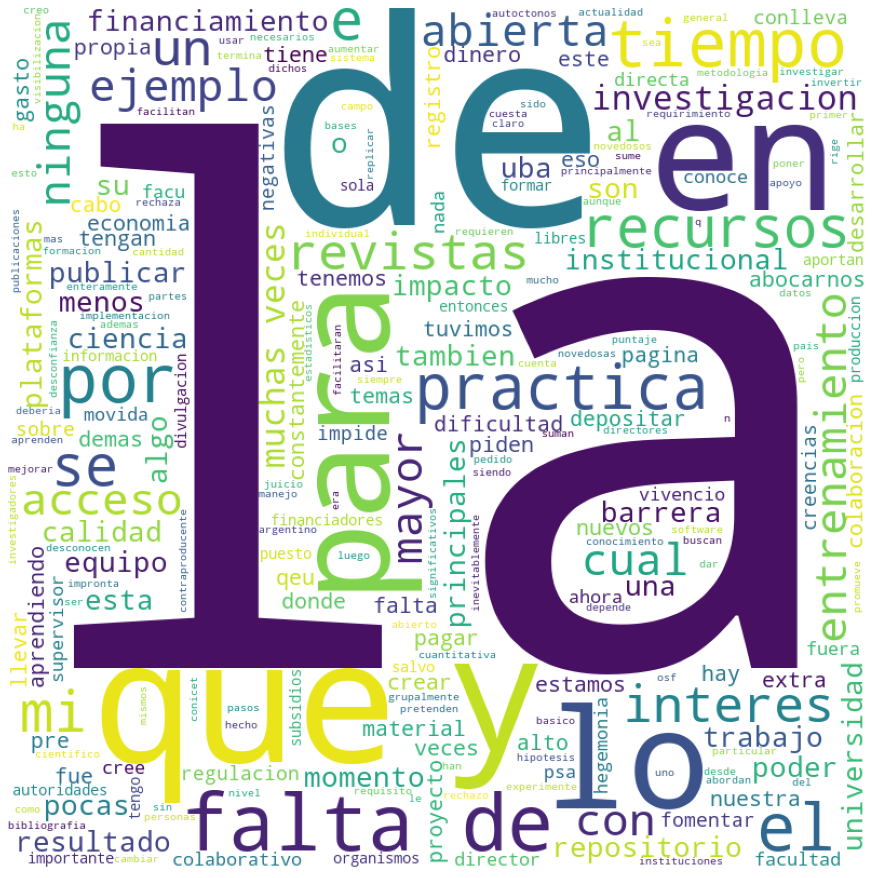

In [162]:
make_worldcloud(extract_text(df["barriers_2"]), STOPWORDS)